In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")

In [3]:
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")

In [4]:
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")

In [5]:
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
previous_application = pd.read_csv("previous_application.csv")

In [6]:
columns_desc = pd.read_csv("HomeCredit_columns_description.csv", encoding="ISO-8859-1")
sample_submission = pd.read_csv("sample_submission.csv")

In [9]:
for name, df in datasets.items():
    print(f"\n{'='*60}")
    print(f"DATASET: {name}")
    print(f"Shape: {df.shape}")
    print(f"{'='*60}")
    display(df.head(5))



DATASET: application_train
Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



DATASET: application_test
Shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



DATASET: bureau
Shape: (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN



DATASET: bureau_balance
Shape: (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C



DATASET: credit_card_balance
Shape: (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0



DATASET: installments_payments
Shape: (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585



DATASET: POS_CASH_balance
Shape: (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0



DATASET: previous_application
Shape: (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN



DATASET: sample_submission
Shape: (48744, 2)


,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [10]:
target_count = application_train['TARGET'].value_counts()
target_ratio = application_train['TARGET'].value_counts(normalize=True)

print("Target Count:")
print(target_count)

print("\nTarget Ratio:")
print(target_ratio)


Target Count:
0    282686
1     24825
Name: TARGET, dtype: int64

Target Ratio:
0    0.919271
1    0.080729
Name: TARGET, dtype: float64


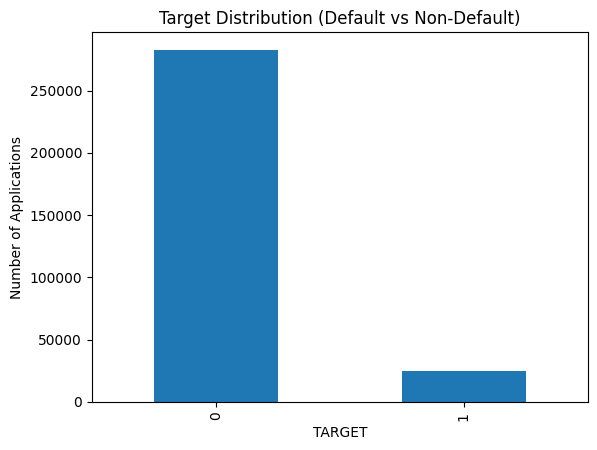

,Count,Percentage (%)
0,282686,91.93
1,24825,8.07


In [14]:
import matplotlib.pyplot as plt

plt.figure()
application_train['TARGET'].value_counts().plot(kind='bar')
plt.title('Target Distribution (Default vs Non-Default)')
plt.xlabel('TARGET')
plt.ylabel('Number of Applications')
plt.show()

target_summary = pd.DataFrame({
    "Count": target_count,
    "Percentage (%)": (target_ratio * 100).round(2)
})

target_summary



In [15]:
train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (307511, 122)
Test shape: (48744, 121)


In [16]:
#Pilih fitur & sedikit EDA numerik

In [17]:
candidate_features = [
    "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY",
    "DAYS_BIRTH", "DAYS_EMPLOYED", "CNT_CHILDREN",
    "NAME_INCOME_TYPE", "CODE_GENDER", "NAME_FAMILY_STATUS",
    "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3",
    "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"
]

features = [c for c in candidate_features if c in train.columns]
print("Features used:", features)

# lihat proporsi TARGET
print("\nTarget distribution:\n", train["TARGET"].value_counts(normalize=True).map("{:.3f}".format))


Features used: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS']

Target distribution:
 0    0.919
1    0.081
Name: TARGET, dtype: object


In [18]:
#Preprocessing minimal & optional sampling

In [19]:
SAMPLE_N = 100000   # set None untuk pakai semua data

df = train[features + ["SK_ID_CURR", "TARGET"]].copy()

df["loan_to_income"] = df["AMT_CREDIT"] / (df["AMT_INCOME_TOTAL"].replace(0, np.nan))
features += ["loan_to_income"]

if "DAYS_EMPLOYED" in df.columns:
    df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].replace(365243, np.nan)

miss_pct = df.isnull().mean().sort_values(ascending=False)
print("\nMissing % (top 10):\n", miss_pct.head(10))

if SAMPLE_N is not None:
    df = (df
          .groupby("TARGET", group_keys=False)
          .apply(lambda x: x.sample(frac=SAMPLE_N/len(train) if len(train)>0 else 1, random_state=RANDOM_SEED))
         )
    df = df.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)
    print("\nAfter sampling shape:", df.shape)

y = df["TARGET"].values
X = df.drop(columns=["TARGET","SK_ID_CURR"])
print("\nX shape:", X.shape)



Missing % (top 10):
 EXT_SOURCE_1        0.563811
EXT_SOURCE_3        0.198253
DAYS_EMPLOYED       0.180072
EXT_SOURCE_2        0.002146
AMT_ANNUITY         0.000039
CNT_FAM_MEMBERS     0.000007
AMT_INCOME_TOTAL    0.000000
TARGET              0.000000
SK_ID_CURR          0.000000
DAYS_ID_PUBLISH     0.000000
dtype: float64

After sampling shape: (100000, 17)

X shape: (100000, 15)


In [20]:
#Imputasi & encoding sederhana

In [21]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

for c in num_cols:
    med = X[c].median()
    X[c] = X[c].fillna(med)

label_encoders = {}
for c in cat_cols:
    X[c] = X[c].fillna("XNA")
    le = LabelEncoder()
    X[c] = le.fit_transform(X[c].astype(str))
    label_encoders[c] = le

print("Numeric cols:", len(num_cols), "Categorical cols:", len(cat_cols))


Numeric cols: 12 Categorical cols: 3


In [22]:
#LightGBM Stratified CV training & OOF predictions

In [24]:
NFOLD = 5
skf = StratifiedKFold(n_splits=NFOLD, shuffle=True, random_state=RANDOM_SEED)

oof_pred = np.zeros(len(X))
feature_importances = pd.DataFrame()
feature_importances["feature"] = X.columns
fold = 0

for train_idx, valid_idx in skf.split(X, y):
    fold += 1
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]

    model = lgb.LGBMClassifier(
        n_estimators=5000,
        learning_rate=0.05,
        num_leaves=64,
        colsample_bytree=0.7,
        subsample=0.7,
        random_state=RANDOM_SEED,
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric="auc",
        callbacks=[
            lgb.early_stopping(stopping_rounds=100),
            lgb.log_evaluation(100)
        ]
    )

    oof_pred[valid_idx] = model.predict_proba(X_valid)[:, 1]
    feature_importances[f"fold_{fold}"] = model.feature_importances_

    fold_auc = roc_auc_score(y_valid, oof_pred[valid_idx])
    print(f"Fold {fold} AUC: {fold_auc:.5f}")

print("\nOverall OOF ROC AUC:", roc_auc_score(y, oof_pred))


[LightGBM] [Info] Number of positive: 6459, number of negative: 73541
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080738 -> initscore=-2.432369
[LightGBM] [Info] Start training from score -2.432369
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.746534	valid_0's binary_logloss: 0.250327
[200]	valid_0's auc: 0.745071	valid_0's binary_logloss: 0.250673
Early stopping, best iteration is:
[107]	valid_0's auc: 0.746611	valid_0's binary_logloss: 0.250247
Fold 1 AUC: 0.74661
[LightGBM] [Info] Number of positive: 6459, number of negative: 73541
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the

In [25]:
#Precision@k and Recall@k

In [26]:
def precision_recall_at_k(y_true, y_pred, k):
    cutoff = int(len(y_pred) * k)
    if cutoff < 1:
        return None, None
    idx = np.argsort(y_pred)[-cutoff:]
    selected_y = y_true[idx]
    precision = selected_y.mean()  
    recall = selected_y.sum() / y_true.sum()  
    return precision, recall

for k in [0.01, 0.05, 0.1]:
    p, r = precision_recall_at_k(y, oof_pred, k)
    if p is not None:
        print(f"Top {int(k*100)}% -> Precision: {p:.4f}, Recall: {r:.4f}")


Top 1% -> Precision: 0.3990, Recall: 0.0494
Top 5% -> Precision: 0.2942, Recall: 0.1822
Top 10% -> Precision: 0.2467, Recall: 0.3056


In [27]:
#Pilih threshold (maximize F1 on OOF) dan confusion matrix

In [28]:
prec, rec, th = precision_recall_curve(y, oof_pred)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1)
best_threshold = th[best_idx] if best_idx < len(th) else 0.5
print(f"Best threshold by OOF F1: {best_threshold:.4f}, Best F1: {f1[best_idx]:.4f}")

y_pred_label = (oof_pred >= best_threshold).astype(int)
cm = confusion_matrix(y, y_pred_label)
tn, fp, fn, tp = cm.ravel()
print("\nConfusion matrix at best threshold:")
print(cm)
print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Precision: {precision_score(y, y_pred_label):.4f}, Recall: {recall_score(y, y_pred_label):.4f}")


Best threshold by OOF F1: 0.1300, Best F1: 0.2845

Confusion matrix at best threshold:
[[78467 13460]
 [ 4502  3571]]
TP: 3571, FP: 13460, TN: 78467, FN: 4502
Precision: 0.2097, Recall: 0.4423


In [29]:
#Feature importance (mean across folds) + plot

,feature,importance_mean
0,EXT_SOURCE_2,794.4
1,DAYS_BIRTH,723.2
2,AMT_CREDIT,672.6
3,EXT_SOURCE_3,663.2
4,DAYS_ID_PUBLISH,611.8
5,AMT_ANNUITY,601.8
6,DAYS_EMPLOYED,600.0
7,loan_to_income,525.2
8,EXT_SOURCE_1,518.4
9,AMT_INCOME_TOTAL,389.4


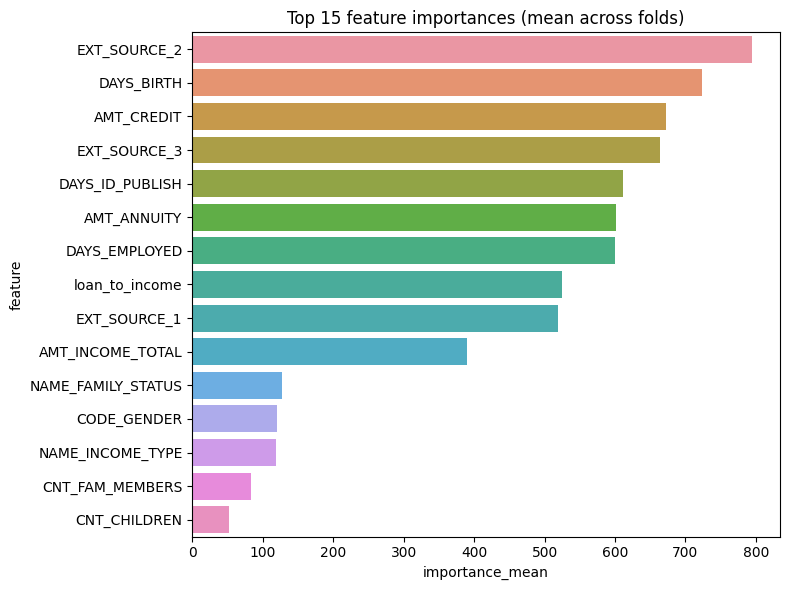

In [30]:
feature_importances["importance_mean"] = feature_importances[[c for c in feature_importances.columns if c.startswith("fold_")]].mean(axis=1)
fi_sorted = feature_importances.sort_values("importance_mean", ascending=False).reset_index(drop=True)
display(fi_sorted[["feature","importance_mean"]].head(20))

plt.figure(figsize=(8,6))
sns.barplot(x="importance_mean", y="feature", data=fi_sorted.head(15))
plt.title("Top 15 feature importances (mean across folds)")
plt.tight_layout()
plt.show()


In [31]:
#SHAP summary

[LightGBM] [Info] Number of positive: 8073, number of negative: 91927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080730 -> initscore=-2.432470
[LightGBM] [Info] Start training from score -2.432470


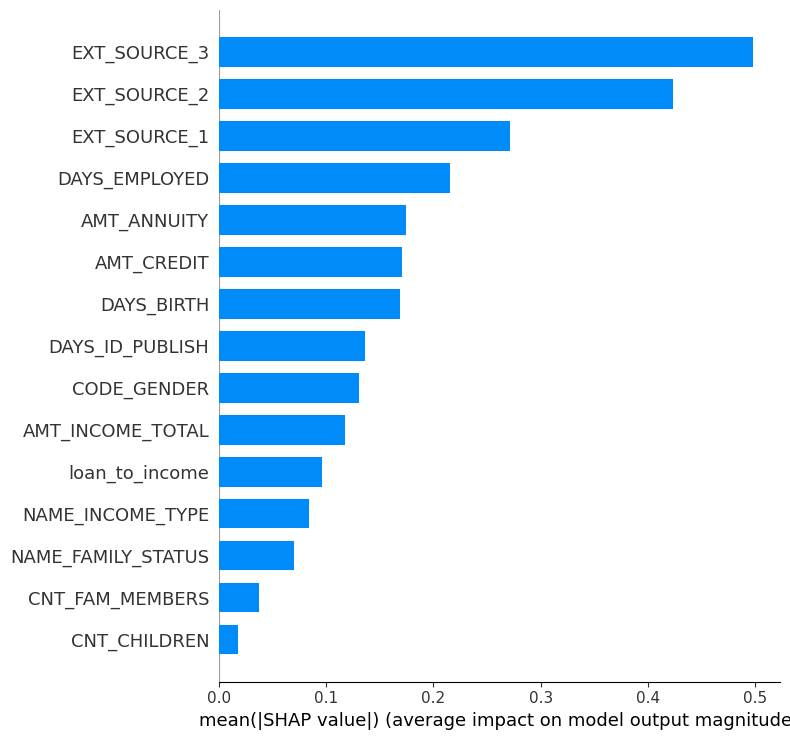

In [35]:
try:
    import shap
    final_model = lgb.LGBMClassifier(
        n_estimators= int(1000),
        learning_rate=0.05,
        num_leaves=64,
        colsample_bytree=0.7,
        subsample=0.7,
        random_state=RANDOM_SEED,
        n_jobs=-1
    )
    final_model.fit(X, y)
    explainer = shap.TreeExplainer(final_model)
    sample_idx = np.random.choice(X.shape[0], min(2000, X.shape[0]), replace=False)
    shap_values = explainer.shap_values(X.iloc[sample_idx])
    shap.summary_plot(shap_values, X.iloc[sample_idx], plot_type="bar")
except Exception as e:
    print("error", e)


In [36]:
#Simple rule-based baseline

In [37]:
X_raw = df.copy()  
r1 = (X_raw["loan_to_income"] > 3).astype(int)
r2 = (X_raw["AMT_ANNUITY"] / (X_raw["AMT_INCOME_TOTAL"].replace(0, np.nan)) > 0.35).astype(int)
r3 = (X_raw["CNT_CHILDREN"] >= 3).astype(int)

rule_score = r1 + r2 + r3
k = 0.1
cutoff = np.percentile(rule_score, 100*(1-k))
selected = rule_score >= cutoff
precision_rule = X_raw.loc[selected, "TARGET"].mean()
recall_rule = X_raw.loc[selected, "TARGET"].sum() / X_raw["TARGET"].sum()
print(f"Rule-based Top {int(k*100)}% -> Precision: {precision_rule:.4f}, Recall: {recall_rule:.4f}")

p_model, r_model = precision_recall_at_k(y, oof_pred, 0.1)
print(f"Model Top 10% -> Precision: {p_model:.4f}, Recall: {r_model:.4f}")


Rule-based Top 10% -> Precision: 0.0812, Recall: 0.5505
Model Top 10% -> Precision: 0.2467, Recall: 0.3056
